In [1]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pickle

In [2]:
file = open('model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

## With Log 

In [3]:
x_train = data['x_train_log']
x_test = data['x_test_log']
y_train = data['y_train_log']
y_test = data['y_test_log']

In [4]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [5]:
y_pred = dtr.predict(x_test)

In [6]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1023544766392082
MSE: 2.058205728122176
RMSE: 1.4346448090458404


In [7]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12, 15, 20],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [8]:
dt_random = RandomizedSearchCV(
    estimator = dtr, 
    param_distributions = parameters,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [9]:
dt_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12, 15,
                                                      20],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
              

In [10]:
dt_random.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.2,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 80,
 'max_features': 'auto',
 'max_depth': 12}

In [11]:
prediction = dt_random.predict(x_test)

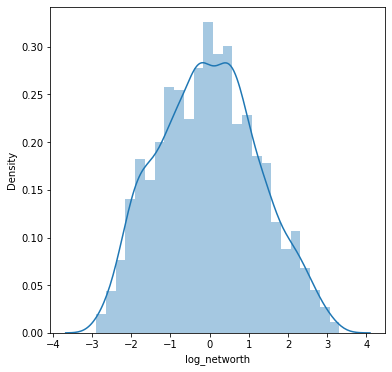

In [12]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.0458254974093055
MSE: 1.6239443195918013
RMSE: 1.2743407392027462


In [14]:
file = open('DecisionTreeLog.pkl', 'wb')
pickle.dump(dt_random, file)

## Without Log 

In [15]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [16]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [17]:
y_pred = dtr.predict(x_test)

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 36214131.90388161
MSE: 3912193193594815.5
RMSE: 62547527.4778693


In [19]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12, 15, 20],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [20]:
dt_random = RandomizedSearchCV(
    estimator = dtr, 
    param_distributions = parameters,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [21]:
dt_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=15, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12, 15,
                                                      20],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
              

In [22]:
dt_random.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.2,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 80,
 'max_features': 'auto',
 'max_depth': 12}

In [23]:
prediction = dt_random.predict(x_test)

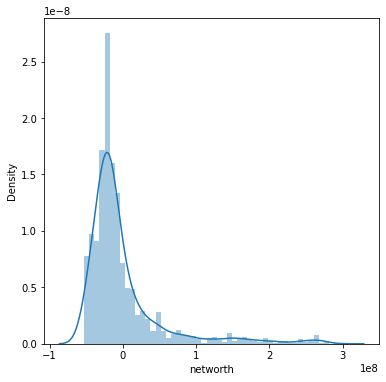

In [24]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34962683.82372712
MSE: 3027104936082561.0
RMSE: 55019132.45483394


In [26]:
file = open('DecisionTree.pkl', 'wb')
pickle.dump(dt_random, file)